In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Import Data

In [4]:
df=pd.read_csv(r"D:\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


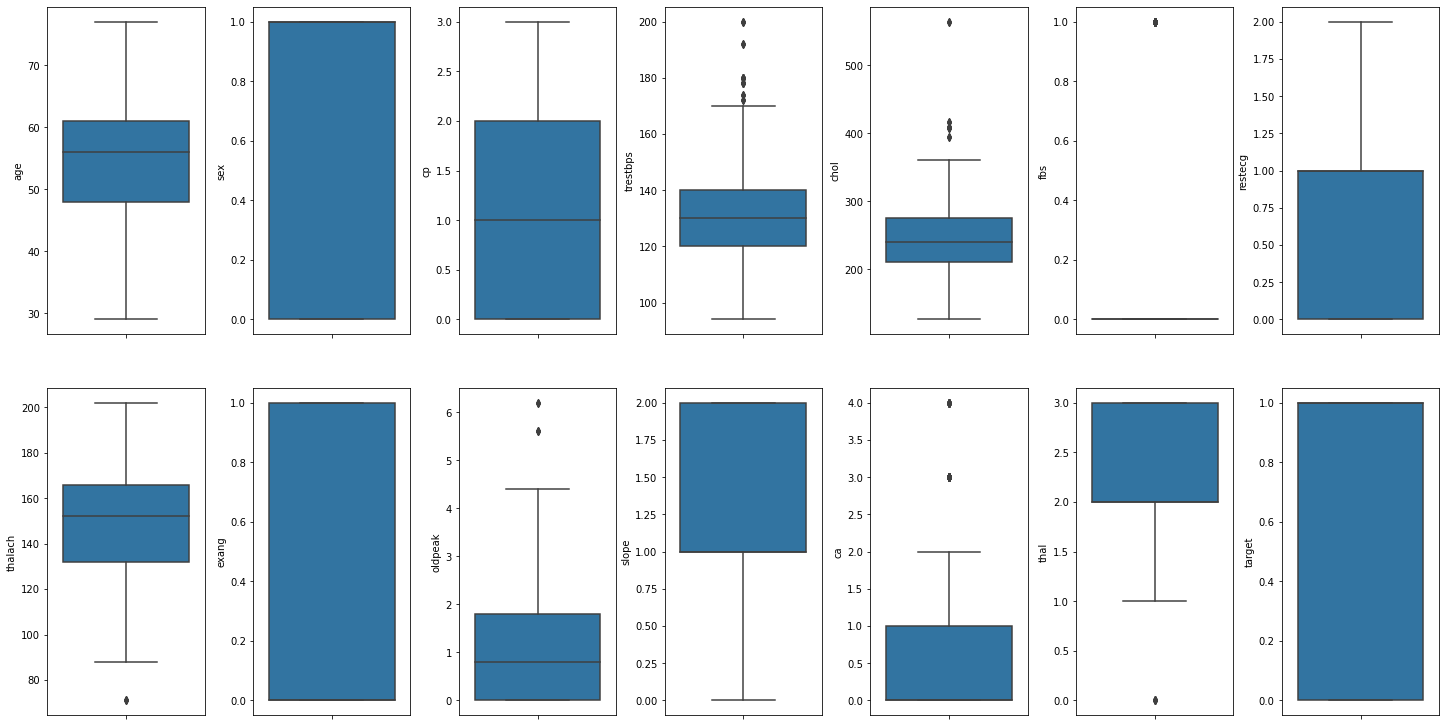

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [8]:
  for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column sex outliers = 0.00%
Column cp outliers = 0.00%
Column trestbps outliers = 4.39%
Column chol outliers = 1.56%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.39%
Column exang outliers = 0.00%
Column oldpeak outliers = 0.68%
Column slope outliers = 0.00%
Column ca outliers = 8.49%
Column thal outliers = 0.68%
Column target outliers = 0.00%


In [9]:
df.drop(columns=(["fbs"]),inplace=True)

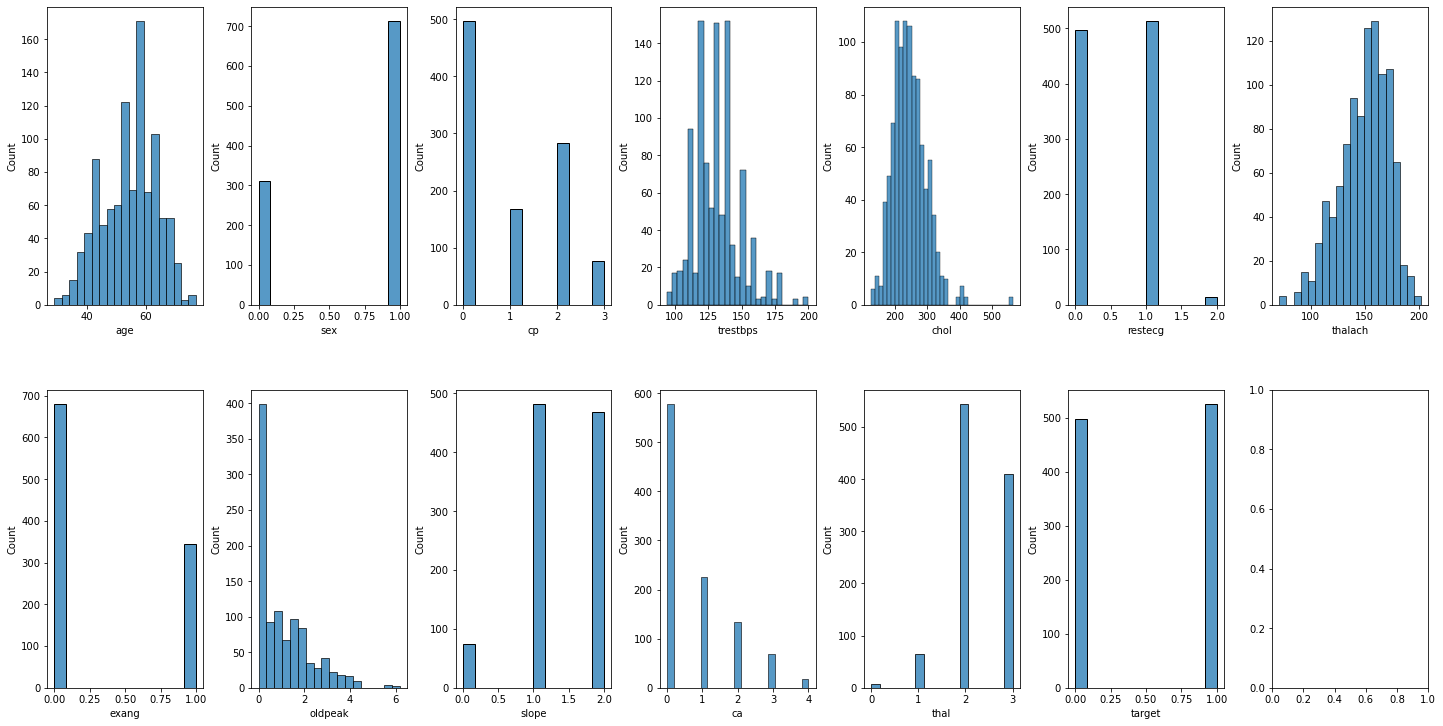

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

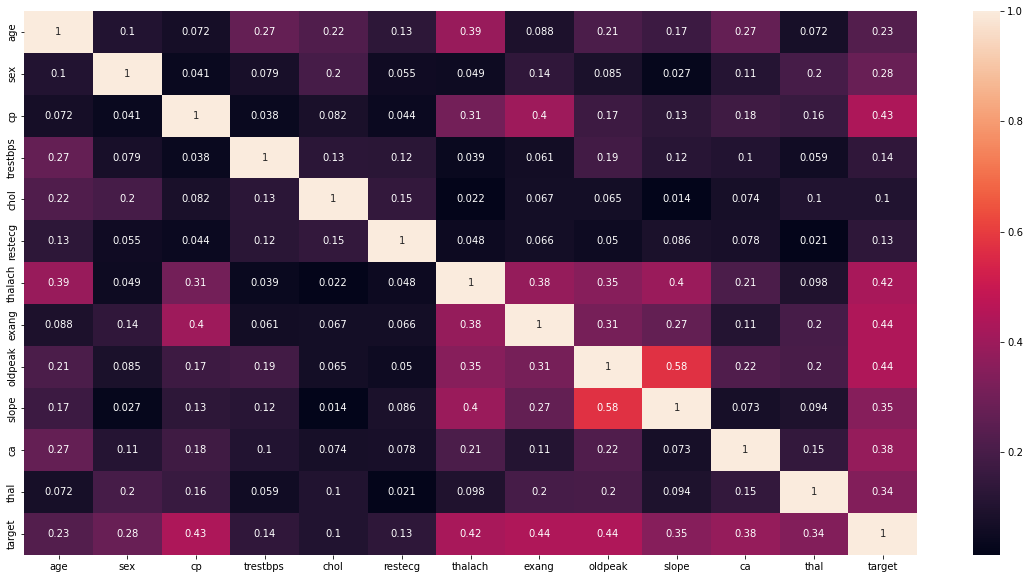

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True);

In [12]:
df["target"].corr(df["oldpeak"])

-0.4384412701119447

In [13]:
df["target"].corr(df["slope"])

0.3455117514359989

In [14]:
df.drop(columns=(["oldpeak"]),inplace=True)

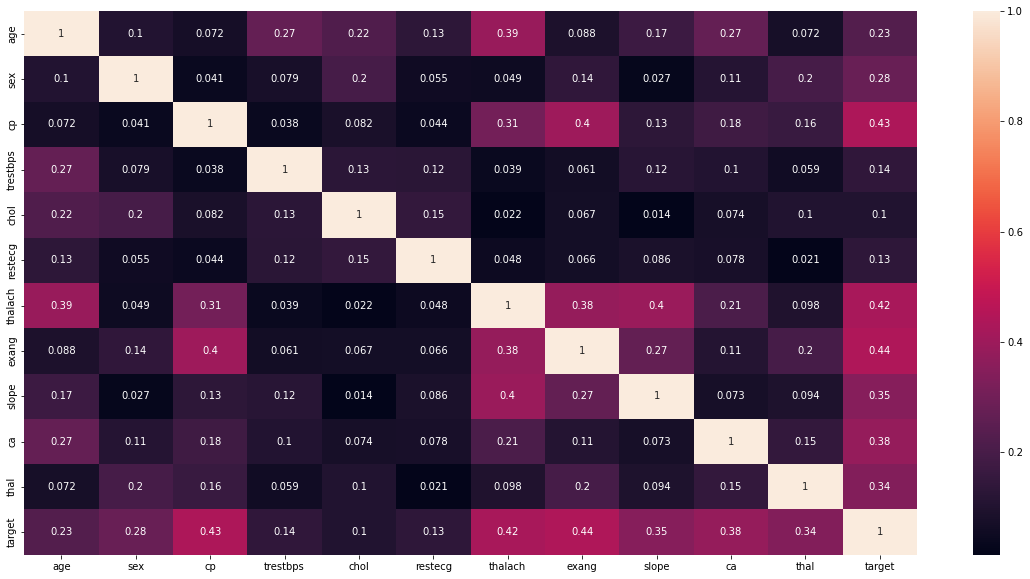

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True);

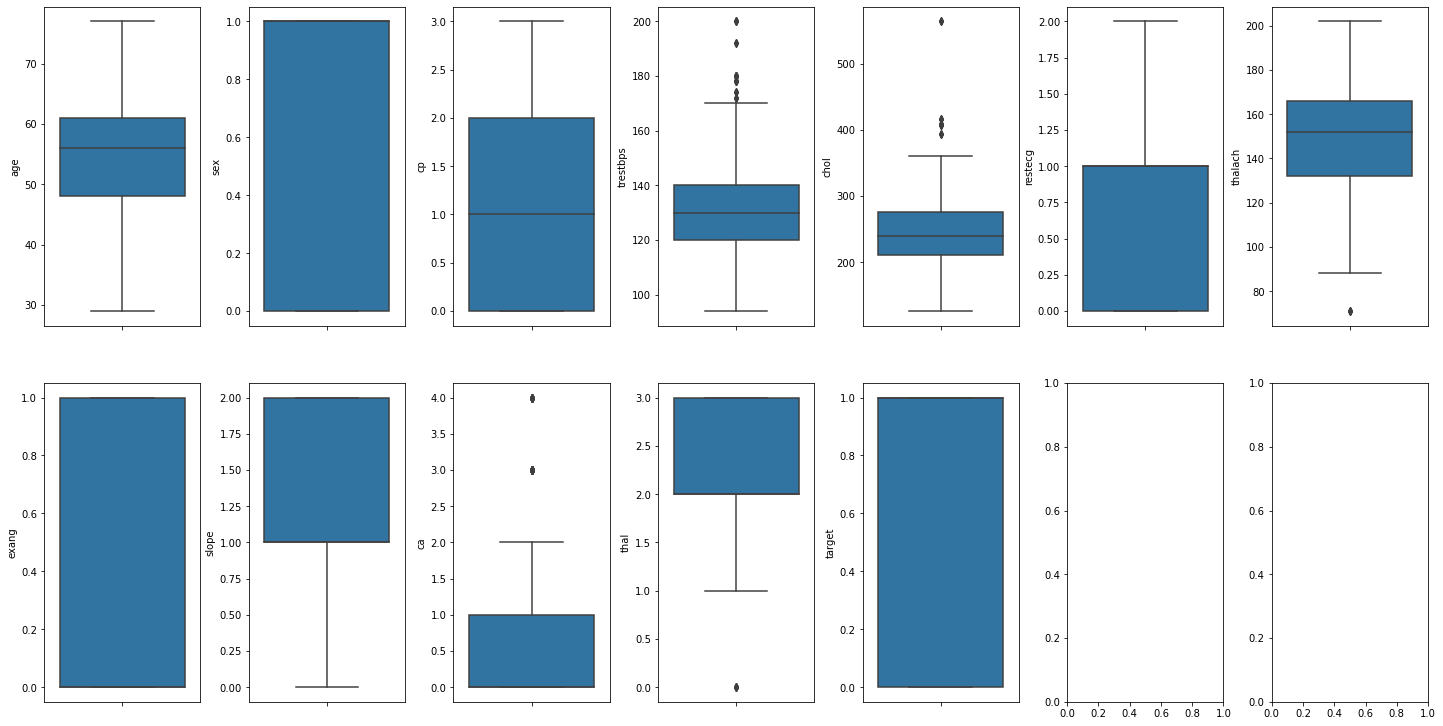

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

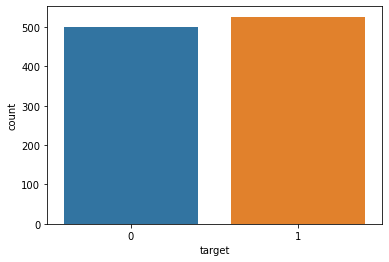

In [17]:
sns.countplot(x='target',data=df)
plt.show()

In [21]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,2,2,3,0
1,53,1,0,140,203,0,155,1,0,0,3,0
2,70,1,0,145,174,1,125,1,0,0,3,0
3,61,1,0,148,203,1,161,0,2,1,3,0
4,62,0,0,138,294,1,106,0,1,3,2,0


In [22]:
# SELECT ALL FEATURE

# all features
X= df.iloc[:,:-1]

#target output (MEDV)
y=df.iloc[:,[11]]

In [23]:
X

,age,sex,cp,trestbps,chol,restecg,thalach,exang,slope,ca,thal
0,52,1,0,125,212,1,168,0,2,2,3
1,53,1,0,140,203,0,155,1,0,0,3
2,70,1,0,145,174,1,125,1,0,0,3
3,61,1,0,148,203,1,161,0,2,1,3
4,62,0,0,138,294,1,106,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,164,1,2,0,2
1021,60,1,0,125,258,0,141,1,1,1,3
1022,47,1,0,110,275,0,118,1,1,1,2
1023,50,0,0,110,254,0,159,0,2,0,2


In [24]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 11)
(205, 11)
(820, 1)
(205, 1)


In [27]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred=model.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Predicted'])

In [29]:
y_pred.head()

,Predicted
0,1
1,1
2,0
3,1
4,0


In [30]:
print("MAE:" ,metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" ,metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" ,np.sqrt (metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.2097560975609756
MSE: 0.2097560975609756
RMSE: 0.45799137280190727


In [50]:
model.score(X_train,y_train)

0.8426829268292683

In [51]:
confusion_matrix(y_test,y_pred)

array([[74, 28],
       [15, 88]], dtype=int64)

# Roc Curve


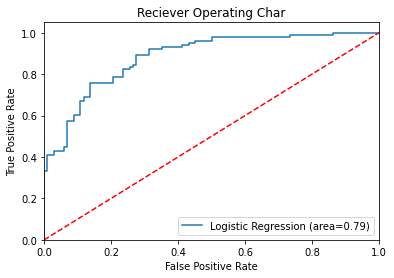

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_curve=roc_auc_score(y_test,model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,-1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' %logit_roc_curve );
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Char")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()